# Demo of Stacking

The program is modified from the following program.
https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Visualize the data set

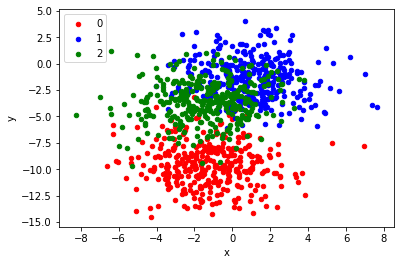

In [2]:
# scatter plot of blobs dataset
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### Building a baseline single model

In [3]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)

(100, 2) (1000, 2)


In [4]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=2)

Train on 100 samples, validate on 1000 samples
Epoch 1/200
100/100 - 1s - loss: 1.8632 - accuracy: 0.2800 - val_loss: 1.8081 - val_accuracy: 0.2530
Epoch 2/200
100/100 - 0s - loss: 1.7533 - accuracy: 0.2900 - val_loss: 1.7002 - val_accuracy: 0.2510
Epoch 3/200
100/100 - 0s - loss: 1.6442 - accuracy: 0.3000 - val_loss: 1.5998 - val_accuracy: 0.2510
Epoch 4/200
100/100 - 0s - loss: 1.5439 - accuracy: 0.3000 - val_loss: 1.5062 - val_accuracy: 0.2490
Epoch 5/200
100/100 - 0s - loss: 1.4512 - accuracy: 0.3000 - val_loss: 1.4208 - val_accuracy: 0.2520
Epoch 6/200
100/100 - 0s - loss: 1.3626 - accuracy: 0.2800 - val_loss: 1.3417 - val_accuracy: 0.2730
Epoch 7/200
100/100 - 0s - loss: 1.2860 - accuracy: 0.3200 - val_loss: 1.2701 - val_accuracy: 0.2990
Epoch 8/200
100/100 - 0s - loss: 1.2134 - accuracy: 0.3600 - val_loss: 1.2058 - val_accuracy: 0.3220
Epoch 9/200
100/100 - 0s - loss: 1.1486 - accuracy: 0.3800 - val_loss: 1.1489 - val_accuracy: 0.3220
Epoch 10/200
100/100 - 0s - loss: 1.0905 - a

Epoch 81/200
100/100 - 0s - loss: 0.5988 - accuracy: 0.7000 - val_loss: 0.6729 - val_accuracy: 0.6830
Epoch 82/200
100/100 - 0s - loss: 0.5969 - accuracy: 0.7000 - val_loss: 0.6708 - val_accuracy: 0.6830
Epoch 83/200
100/100 - 0s - loss: 0.5953 - accuracy: 0.7000 - val_loss: 0.6691 - val_accuracy: 0.6840
Epoch 84/200
100/100 - 0s - loss: 0.5939 - accuracy: 0.7000 - val_loss: 0.6680 - val_accuracy: 0.6840
Epoch 85/200
100/100 - 0s - loss: 0.5922 - accuracy: 0.7000 - val_loss: 0.6669 - val_accuracy: 0.6840
Epoch 86/200
100/100 - 0s - loss: 0.5907 - accuracy: 0.7000 - val_loss: 0.6653 - val_accuracy: 0.6870
Epoch 87/200
100/100 - 0s - loss: 0.5891 - accuracy: 0.7000 - val_loss: 0.6625 - val_accuracy: 0.6880
Epoch 88/200
100/100 - 0s - loss: 0.5877 - accuracy: 0.6900 - val_loss: 0.6593 - val_accuracy: 0.6870
Epoch 89/200
100/100 - 0s - loss: 0.5860 - accuracy: 0.7000 - val_loss: 0.6572 - val_accuracy: 0.6880
Epoch 90/200
100/100 - 0s - loss: 0.5847 - accuracy: 0.7000 - val_loss: 0.6559 - v

Epoch 161/200
100/100 - 0s - loss: 0.5015 - accuracy: 0.7600 - val_loss: 0.5789 - val_accuracy: 0.7440
Epoch 162/200
100/100 - 0s - loss: 0.5007 - accuracy: 0.7500 - val_loss: 0.5777 - val_accuracy: 0.7470
Epoch 163/200
100/100 - 0s - loss: 0.4997 - accuracy: 0.7500 - val_loss: 0.5769 - val_accuracy: 0.7500
Epoch 164/200
100/100 - 0s - loss: 0.4988 - accuracy: 0.7500 - val_loss: 0.5754 - val_accuracy: 0.7520
Epoch 165/200
100/100 - 0s - loss: 0.4977 - accuracy: 0.7600 - val_loss: 0.5741 - val_accuracy: 0.7530
Epoch 166/200
100/100 - 0s - loss: 0.4970 - accuracy: 0.7600 - val_loss: 0.5728 - val_accuracy: 0.7570
Epoch 167/200
100/100 - 0s - loss: 0.4961 - accuracy: 0.7600 - val_loss: 0.5731 - val_accuracy: 0.7530
Epoch 168/200
100/100 - 0s - loss: 0.4953 - accuracy: 0.7600 - val_loss: 0.5730 - val_accuracy: 0.7530
Epoch 169/200
100/100 - 0s - loss: 0.4944 - accuracy: 0.7600 - val_loss: 0.5728 - val_accuracy: 0.7530
Epoch 170/200
100/100 - 0s - loss: 0.4939 - accuracy: 0.7600 - val_loss: 

In [6]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.790, Test: 0.771


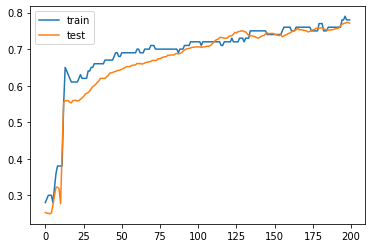

In [7]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## A Stacking Model

### Build 5 individual models

In [8]:
# # example of saving sub-models for later use in a stacking ensemble
# from sklearn.datasets import make_blobs
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense
# from matplotlib import pyplot
from os import makedirs

# fit model on dataset
def fit_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Dense(25, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=200, verbose=0)
    return model

# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)
# create directory for models
# makedirs('models')
# fit and save models
n_members = 5
for i in range(n_members):
    # fit model
    model = fit_model(trainX, trainy)
    # save model
    filename = 'models/model_' + str(i + 1) + '.h5'
    model.save(filename)
    print('>Saved %s' % filename)

(100, 2) (1000, 2)
>Saved models/model_1.h5
>Saved models/model_2.h5
>Saved models/model_3.h5
>Saved models/model_4.h5
>Saved models/model_5.h5


### Build a logistic regression model on top of the 5 individual models

In [9]:
# stacked generalization with linear meta model on blobs dataset
# from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model
# from keras.utils import to_categorical
from numpy import dstack

# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'models/model_' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression()
	model.fit(stackedX, inputy)
	return model

# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)
# load all models
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
# evaluate standalone models on test dataset
for model in members:
	testy_enc = to_categorical(testy)
	_, acc = model.evaluate(testX, testy_enc, verbose=0)
	print('Model Accuracy: %.3f' % acc)
# fit stacked model using the ensemble
model = fit_stacked_model(members, testX, testy)
# evaluate model on test set
yhat = stacked_prediction(members, model, testX)
acc = accuracy_score(testy, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

(100, 2) (1000, 2)
>loaded models/model_1.h5
>loaded models/model_2.h5
>loaded models/model_3.h5
>loaded models/model_4.h5
>loaded models/model_5.h5
Loaded 5 models
Model Accuracy: 0.785
Model Accuracy: 0.792
Model Accuracy: 0.795
Model Accuracy: 0.792
Model Accuracy: 0.760
Stacked Test Accuracy: 0.825
